# ML Assignment 4: NN Classifier

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import keras

### 2. Loading and Understadning the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 3. Handling Null Values


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 4. Removing redundant columns and converting categorical data to numerical

In [8]:
drop = ['RowNumber', 'CustomerId', 'Surname' ]
df.drop(drop, axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df[['Geography', 'Gender']])
enc.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [10]:
one_hot = enc.transform(df[['Geography', 'Gender']]).toarray()
one_hot

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [11]:
df[['France', 'Germany', 'Spain', 'Female', 'Male']] = one_hot

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [13]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male'], dtype=object)

In [14]:
df_new = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain', 'Female', 'Male', 'Exited']]

In [15]:
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0,1
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0,0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0,1
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0,0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0,0
9997,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0,1


### 5. Splitting thr dataset into training and test sets

In [16]:
x = df_new.iloc[: , :-1].values
y =  df_new.iloc[: , -1].values

In [17]:
print(x)

[[619.  42.   2. ...   0.   1.   0.]
 [608.  41.   1. ...   1.   1.   0.]
 [502.  42.   8. ...   0.   1.   0.]
 ...
 [709.  36.   7. ...   0.   1.   0.]
 [772.  42.   3. ...   0.   0.   1.]
 [792.  28.   4. ...   0.   1.   0.]]


In [18]:
print(y)

[1 0 1 ... 1 1 0]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
print(X_train)

[[673.  59.   0. ...   0.   0.   1.]
 [850.  41.   8. ...   0.   0.   1.]
 [725.  31.   6. ...   0.   1.   0.]
 ...
 [735.  38.   1. ...   0.   1.   0.]
 [667.  43.   8. ...   0.   0.   1.]
 [697.  51.   1. ...   0.   0.   1.]]


In [21]:
print(X_test)

[[596.  32.   3. ...   0.   0.   1.]
 [623.  43.   1. ...   0.   0.   1.]
 [601.  44.   4. ...   1.   1.   0.]
 ...
 [768.  25.   0. ...   0.   0.   1.]
 [690.  36.   6. ...   0.   1.   0.]
 [604.  25.   5. ...   0.   1.   0.]]


In [22]:
print(y_train)

[1 0 0 ... 1 1 0]


In [23]:
print(y_test)

[0 0 0 ... 0 0 0]


### 6. Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [25]:
print(X_train.shape)
print(X_train)

(7500, 13)
[[ 0.21835119  1.91661905 -1.73168869 ... -0.57735027 -0.91186722
   0.91186722]
 [ 2.05728037  0.20210899  1.04174968 ... -0.57735027 -0.91186722
   0.91186722]
 [ 0.75860157 -0.75039661  0.34839008 ... -0.57735027  1.09665089
  -1.09665089]
 ...
 [ 0.86249588 -0.08364269 -1.3850089  ... -0.57735027  1.09665089
  -1.09665089]
 [ 0.15601461  0.3926101   1.04174968 ... -0.57735027 -0.91186722
   0.91186722]
 [ 0.46769752  1.15461458 -1.3850089  ... -0.57735027 -0.91186722
   0.91186722]]


In [26]:
print(X_test)

[[-0.51346498 -0.67477467 -0.70903082 ... -0.56318378 -0.91407657
   0.91407657]
 [-0.23710698  0.37764726 -1.3954111  ... -0.56318378 -0.91407657
   0.91407657]
 [-0.46228757  0.47332198 -0.36584069 ...  1.77561931  1.09400025
  -1.09400025]
 ...
 [ 1.24703784 -1.34449772 -1.73860124 ... -0.56318378 -0.91407657
   0.91407657]
 [ 0.44867028 -0.29207579  0.32053959 ... -0.56318378  1.09400025
  -1.09400025]
 [-0.43158112 -1.34449772 -0.02265055 ... -0.56318378  1.09400025
  -1.09400025]]


### 7. Building the ANN Classifier

In [27]:
from keras import Sequential
from keras.layers import Dense

In [28]:
classifier = Sequential()

classifier.add(Dense(activation = "relu", input_dim=13, units=7, kernel_initializer="uniform"))
classifier.add(Dense(activation = "relu", units=7, kernel_initializer="uniform"))
classifier.add(Dense(activation = "sigmoid", units=1, kernel_initializer="uniform"))

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [30]:
classifier.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
750/750 [==============================] - 1s 881us/step - loss: 0.4905 - accuracy: 0.7945
Epoch 2/10
750/750 [==============================] - 1s 909us/step - loss: 0.4331 - accuracy: 0.7947
Epoch 3/10
750/750 [==============================] - 1s 879us/step - loss: 0.4280 - accuracy: 0.7947
Epoch 4/10
750/750 [==============================] - 1s 937us/step - loss: 0.4244 - accuracy: 0.8084
Epoch 5/10
750/750 [==============================] - 1s 927us/step - loss: 0.4217 - accuracy: 0.8209
Epoch 6/10
750/750 [==============================] - 1s 908us/step - loss: 0.4196 - accuracy: 0.8260
Epoch 7/10
750/750 [==============================] - 1s 906us/step - loss: 0.4177 - accuracy: 0.8299
Epoch 8/10
750/750 [==============================] - 1s 951us/step - loss: 0.4159 - accuracy: 0.8312
Epoch 9/10
750/750 [==============================] - 1s 976us/step - loss: 0.4145 - accuracy: 0.8303
Epoch 10/10
750/750 [==============================] - 1s 972us/step - loss: 0.413

### 8. Calculating Metrics

In [31]:
y_pred =  classifier.predict(X_test)
y_pred1 = y_pred > 0.5

79/79 [==============================] - 0s 731us/step


In [32]:
print(y_pred1)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()

accuracy  =(tp+tn)/(tp+tn+fp+fn)
precision =(tp)/(tp+fp)
recall  =(tp)/(tp+fn)
f1_score =2*(( precision * recall)/( precision + recall))

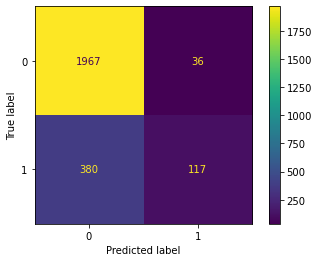

In [35]:
cm = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm).plot()

In [36]:
print( 
    'Accuracy:\t',accuracy*100,
    '\nPrecision:\t',precision*100,
    '\nRecall: \t',recall*100,
    '\nF1-Score:\t',f1_score*100)

Accuracy:	 83.36 
Precision:	 76.47058823529412 
Recall: 	 23.541247484909455 
F1-Score:	 36.00000000000001


In [37]:
print( 
    'Accuracy:\t',accuracy_score(y_test, y_pred1)*100,
    '\nPrecision:\t',precision_score(y_test, y_pred1)*100,
    '\nRecall: \t',recall_score(y_test, y_pred1)*100,)

Accuracy:	 83.36 
Precision:	 76.47058823529412 
Recall: 	 23.541247484909455


### 9. Predicting new values

In [38]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0,1
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0,0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0,1
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0,0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0,0


In [39]:
print(classifier.predict(std.transform([[700, 20, 2, 160000, 1, 1, 1, 1000000, 1, 0, 0, 0, 1]]))>0.5)

1/1 [==============================] - 0s 17ms/step
[[False]]
